#  Setting Up Your Environment

Suggestion: Install free Anaconda Python distribution 

How to setup environment:
- Download Anaconda and install: https://www.anaconda.com/products/distribution
- Create virtual environment
- Open the environment and install networkx
  - Install jupyter notebook: pip install jupyter notebook
  - Install networkx:  pip install networkx
  

## Import libraries in the project

In [76]:
import networkx as nx
import networkx
import matplotlib.pyplot as plt

## 1. Undirected graph

In [77]:
G = networkx.Graph()

## To add a node

In [78]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

## To add an edge

In [79]:
G.add_edge(1,2)
G.add_edge(3,1)
G.add_edge(2,4)
G.add_edge(4,1)
G.add_edge(5,1)
G.add_edge(1,6)
G.add_edge(6,2)

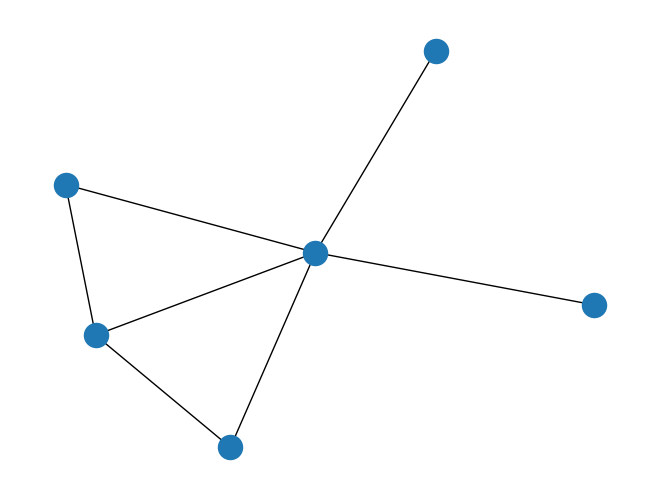

In [80]:
nx.draw(G)

## To add numbering in the node

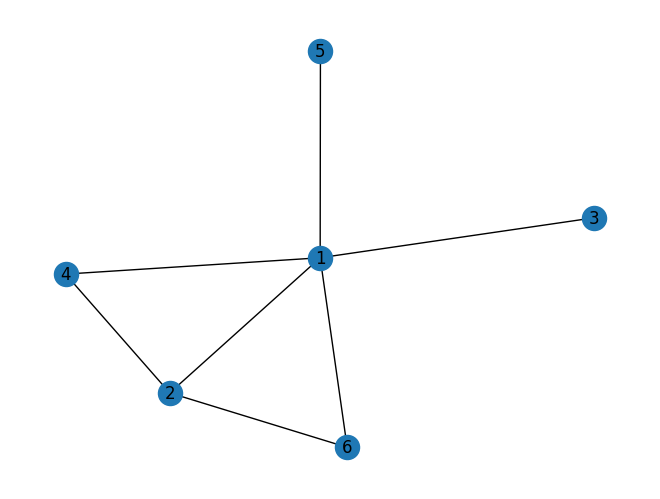

In [64]:
nx.draw(G, with_labels = True)

## To get all the nodes, edges of a graph

In [65]:
node_list = G.nodes()

print(node_list)
  
edge_list = G.edges()

print(edge_list)

[1, 2, 3, 4, 5, 6]
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 4), (2, 6)]


## To remove a node, edge of a graph

[1, 2, 3, 5, 6]
[(1, 3), (1, 5), (1, 6), (2, 6)]


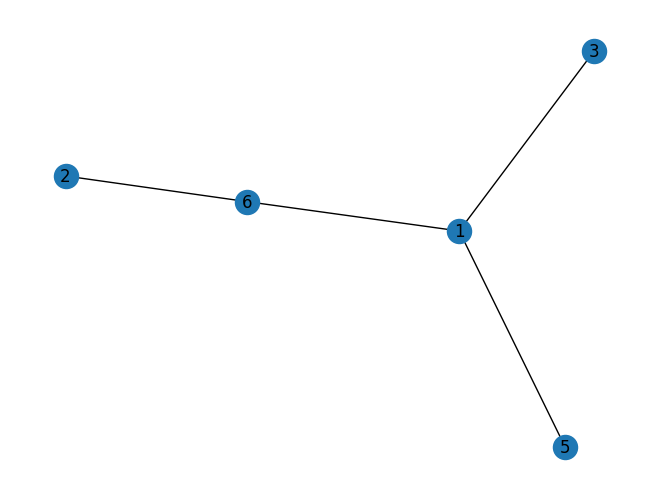

In [66]:
G.remove_node(4)
node_list = G.nodes()

print(node_list)
  
G.remove_edge(1,2)
edge_list = G.edges()

print(edge_list)

nx.draw(G, with_labels = True)

## To find number of nodes, edges

In [67]:
n = G.number_of_nodes()
print(n)

m = G.number_of_edges()
print(m)

5
4


## Finding the neighbours of node

In [68]:
list(G.adj[1])

[3, 5, 6]

# Creating undirected Graph from edge list

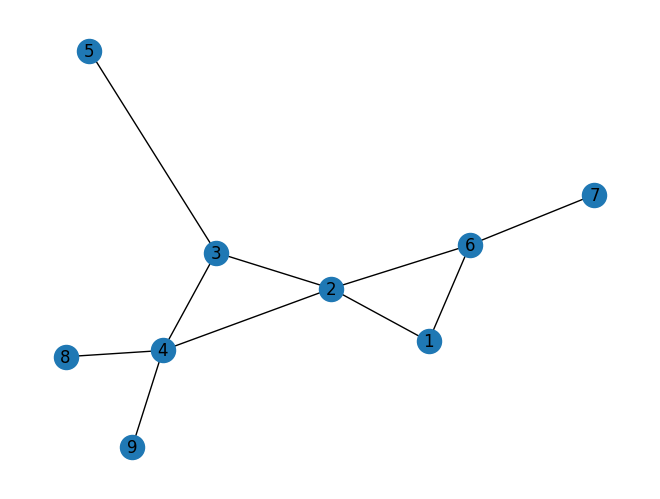

In [69]:
import networkx as nx
G = nx.Graph()
edges = [(1, 2, 5), (1, 6, 2), (2, 3, 6), (2, 4, 3), 
         (2, 6, 5), (3, 4, 6), (3, 5, 1), (4, 8, 9),
         (4, 9, 8), (6, 7, 4)]
G.add_weighted_edges_from(edges)
#nx.draw_networkx(G)
nx.draw(G, with_labels = True)

## We can add the edges via an Edge List, which needs to be saved in a .txt format (eg. edge_list.txt)

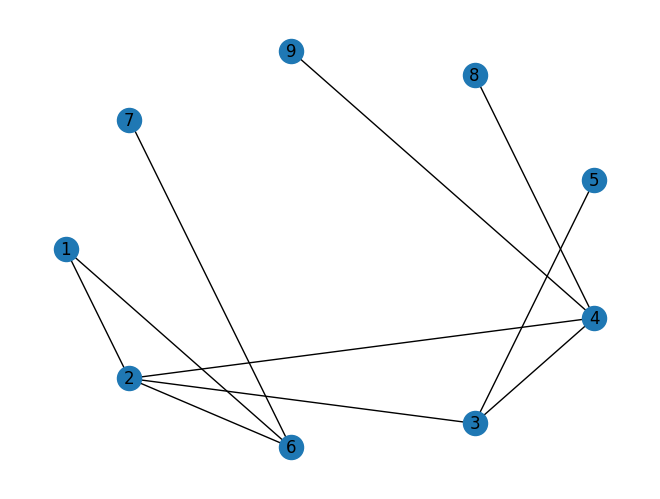

In [70]:
G = nx.read_edgelist('./data/edge_list.txt', data =[('Weight', int)])
#nx.draw(G, with_labels = True)
#nx.draw(G, pos=nx.spiral_layout(G))
nx.draw(G, pos=nx.shell_layout(G),with_labels = True)
#nx.draw(G, pos=nx.spiral_layout(G),with_labels = True)
plt.show()

## Edge list can also be read via a Pandas Dataframe

In [71]:
import pandas as pd

df = pd.read_csv('./data/edge_list.txt', delim_whitespace = True, 
                   header = None, names =['n1', 'n2', 'weight'])
G = nx.convert_matrix.from_pandas_edgelist(df, 'n1', 'n2', edge_attr ='weight')
print(list(G.edges(data = True)))

[(1, 2, {'weight': 19}), (1, 6, {'weight': 15}), (2, 3, {'weight': 6}), (2, 4, {'weight': 10}), (2, 6, {'weight': 22}), (6, 7, {'weight': 30}), (3, 4, {'weight': 51}), (3, 5, {'weight': 14}), (4, 8, {'weight': 20}), (4, 9, {'weight': 42})]


# 2. Directed Graph

## Create a directed graph

# nodes:  5
# edges:  8
List of nodes:  [1, 2, 4, 3, 5]
List of edges:  [(1, 2), (1, 4), (2, 3), (2, 4), (4, 3), (3, 5), (5, 4), (5, 1)]
In-degree for nodes:  {1: 1, 2: 1, 4: 3, 3: 2, 5: 1}
Out degree for nodes:  {1: 2, 2: 2, 4: 1, 3: 1, 5: 2}


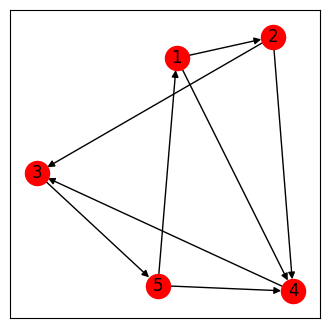

In [81]:
import networkx as nx
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 4), 
                  (2, 3), (2, 4), 
                  (3, 5), 
                  (4, 3), 
                  (5, 4), (5, 1)])

plt.figure(figsize =(4, 4))
nx.draw_networkx(G, with_labels = True, node_color ='red')

print("# nodes: ", int(G.number_of_nodes()))
print("# edges: ", int(G.number_of_edges()))
print("List of nodes: ", list(G.nodes()))
print("List of edges: ", list(G.edges()))
print("In-degree for nodes: ", dict(G.in_degree()))
print("Out degree for nodes: ", dict(G.out_degree))

## 3. Weighted undirected Graph

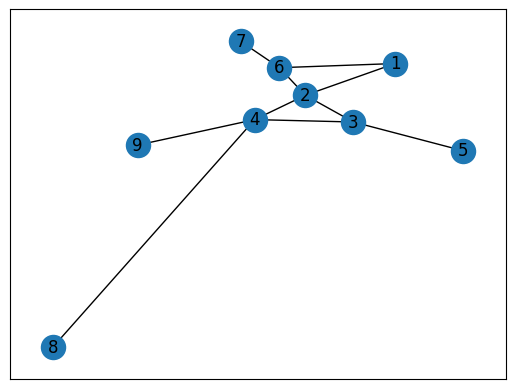

In [82]:
G = nx.Graph()
  
edges = [(1, 2, 2), (1, 6, 1), (2, 3, 6), (2, 4, 7), 
         (2, 6, 9), (3, 4, 3), (3, 5, 2), (4, 8, 0),
         (4, 9, 2), (6, 7, 6)]
  
G.add_weighted_edges_from(edges)
nx.draw_networkx(G, with_labels = True)

## 4. Bipartite graph

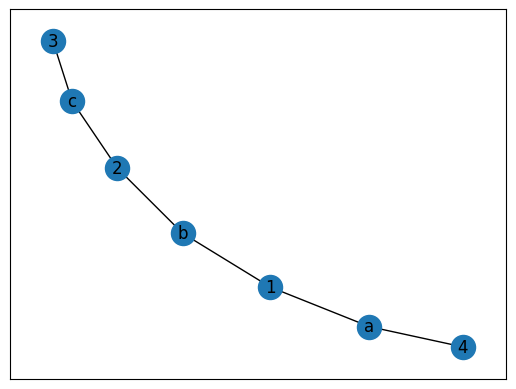

In [84]:
B = nx.Graph()


B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)

B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
nx.draw_networkx(B, with_labels = True)

## 5. The diameter of the graph G

In [100]:
G = nx.Graph([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (4, 5)])
nx.diameter(G)

3

## 6. DAGs / Directed Acyclic Graphs

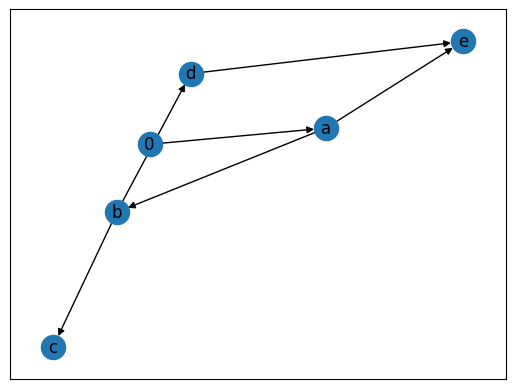

In [102]:
import networkx as nx
G = nx.DiGraph()
G.add_edges_from([("0", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])
nx.draw_networkx(G, with_labels = True)